<a href="https://colab.research.google.com/github/shriju/ANN/blob/main/ANN_mnist_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [2]:
(X_train, y_train),(X_test, y_test)= keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

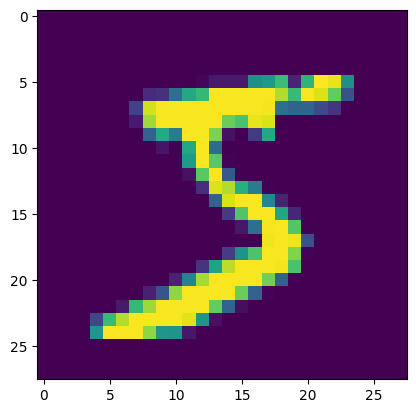

In [5]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [6]:
X_train=X_train/255
X_test=X_test/255

In [7]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [8]:
model = Sequential()

model.add(Flatten(input_shape = (28,28)))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [11]:
history = model.fit(X_train, y_train, epochs=25, validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 9s 5ms/step - loss: 0.2822 - accuracy: 0.9190 - val_loss: 0.1373 - val_accuracy: 0.9597
Epoch 2/25
1500/1500 [==============================] - 7s 4ms/step - loss: 0.1195 - accuracy: 0.9642 - val_loss: 0.1161 - val_accuracy: 0.9653
Epoch 3/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0839 - accuracy: 0.9746 - val_loss: 0.1018 - val_accuracy: 0.9709
Epoch 4/25
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0631 - accuracy: 0.9806 - val_loss: 0.0898 - val_accuracy: 0.9742
Epoch 5/25
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0495 - accuracy: 0.9845 - val_loss: 0.0904 - val_accuracy: 0.9743
Epoch 6/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0391 - accuracy: 0.9873 - val_loss: 0.0909 - val_accuracy: 0.9739
Epoch 7/25
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0342 - accuracy: 0.9893 - val_loss: 0.0913 - val_accuracy:

In [12]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [13]:
y_prob

array([[1.0348241e-18, 3.9648165e-13, 1.2915322e-14, ..., 9.9999994e-01,
        3.6617774e-19, 2.4776860e-16],
       [3.7537224e-19, 1.9506204e-12, 9.9999994e-01, ..., 1.7378507e-25,
        2.4284050e-13, 9.6339253e-27],
       [5.5199182e-11, 9.9997169e-01, 8.9784835e-06, ..., 2.0308651e-06,
        1.7231103e-05, 1.7753515e-10],
       ...,
       [3.2603461e-26, 2.8269201e-16, 2.7068766e-24, ..., 9.4136396e-17,
        4.9423695e-19, 6.0311622e-15],
       [2.6321007e-20, 8.8402355e-15, 2.7040870e-26, ..., 1.6782635e-18,
        5.0343302e-13, 9.8357742e-22],
       [1.4158821e-20, 7.8894608e-32, 3.0291587e-28, ..., 7.2594426e-31,
        7.0842770e-23, 6.8305043e-29]], dtype=float32)

In [14]:
y_pred = y_prob.argmax(axis = 1)

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9768

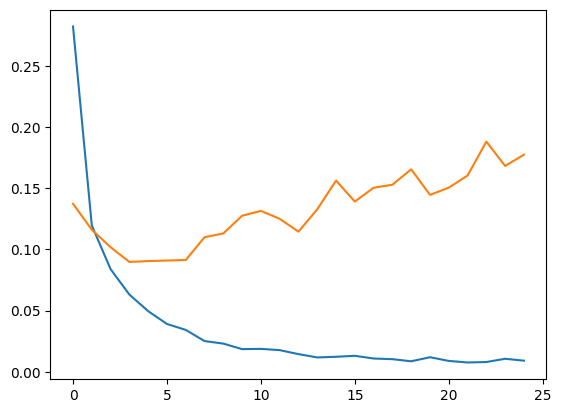

In [16]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

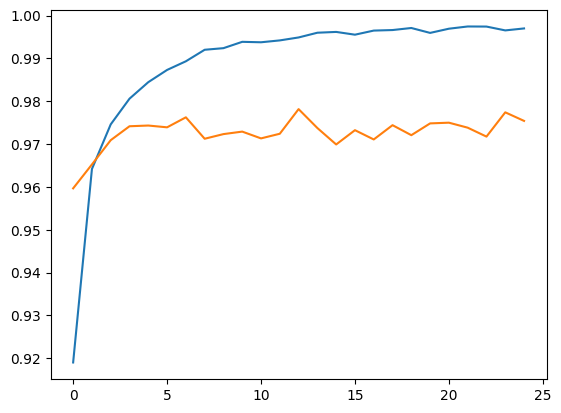

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

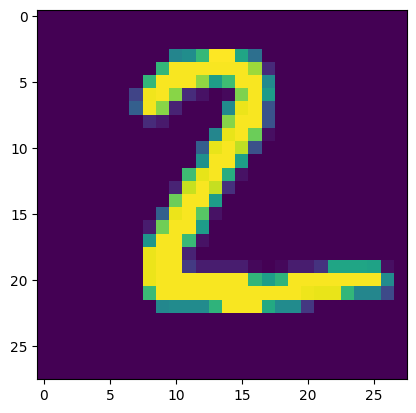

In [18]:
plt.imshow(X_test[1])

In [19]:
model.predict(X_test[1].reshape(1,28,28)).argmax(axis = 1)

1/1 [==============================] - 0s 20ms/step


array([2])